<a href="https://colab.research.google.com/github/KietHuynh02/MachineLeraning/blob/main/MachineLeraning_abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show(close=None, block=None)>

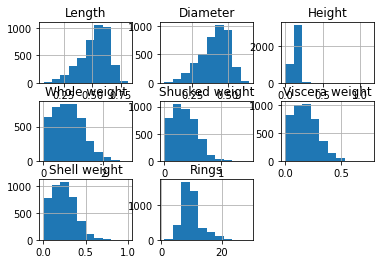

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'abalone.csv'
dataabalone = pd.read_csv(url)
dataabalone.hist()
plt.show

In [6]:
correlationabalone = dataabalone.corr()
print(correlationabalone)

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

<AxesSubplot:>

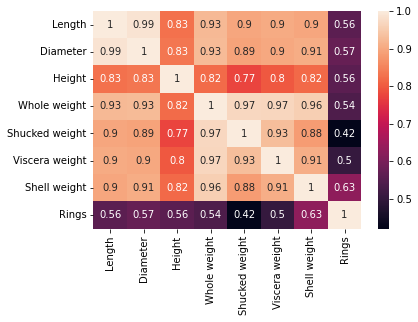

In [7]:
import seaborn as sns
sns.heatmap(correlationabalone, annot = True)

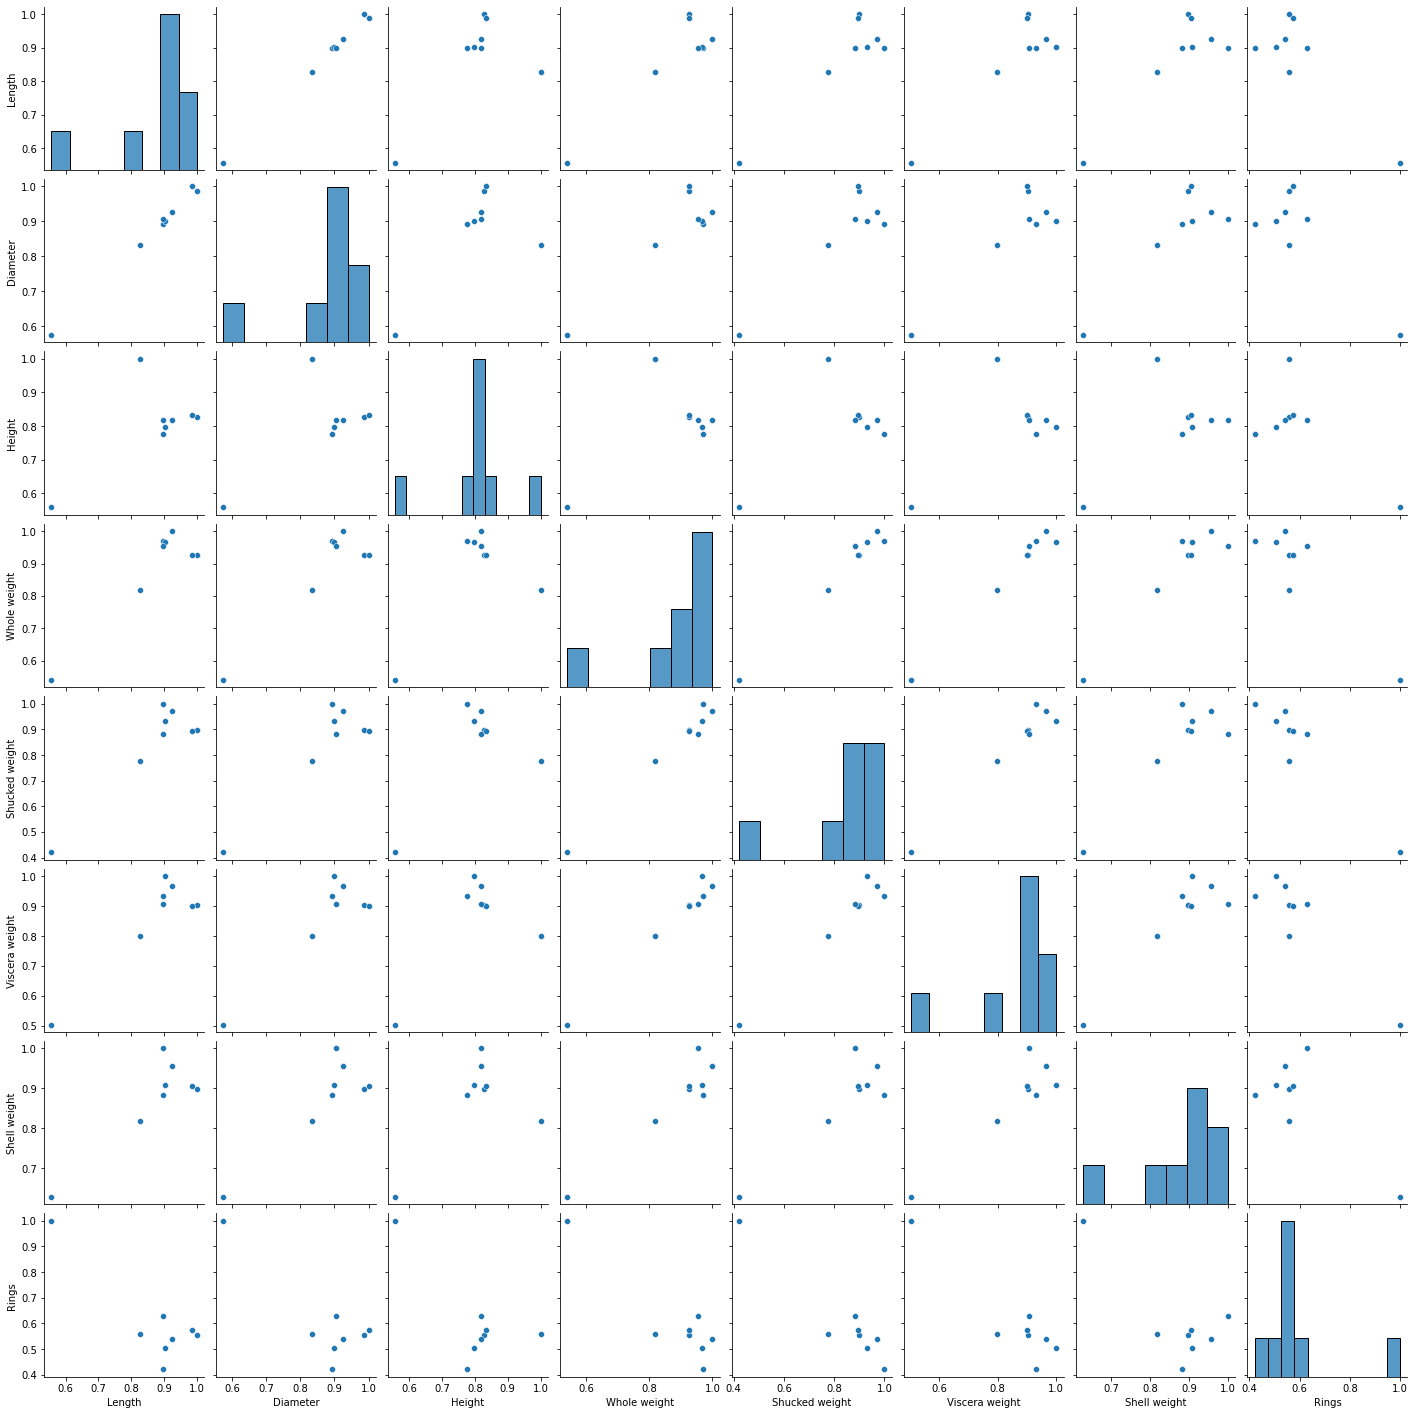

In [8]:
sns.pairplot(correlationabalone)

<AxesSubplot:xlabel='Shucked weight', ylabel='Whole weight'>

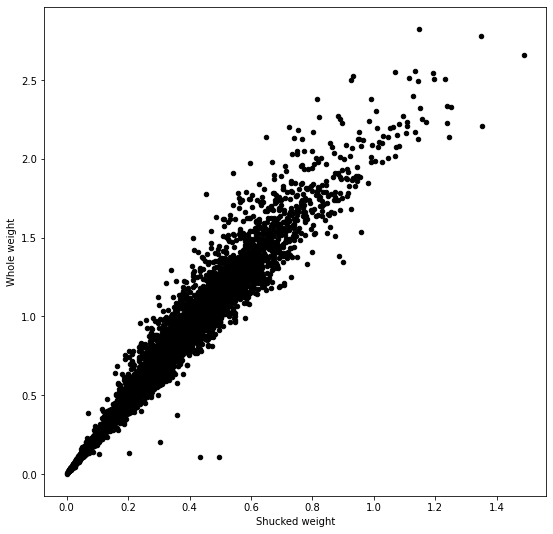

In [9]:
dataabalone.plot(kind = 'scatter', x = 'Shucked weight', y = 'Whole weight', figsize=(9,9), color = 'black')

Intercept của mô hình:  0.05907227403881188
Coeffient của mô hình:  [2.14173488]
Độ chính xác của mô hình:  0.9397469394863921


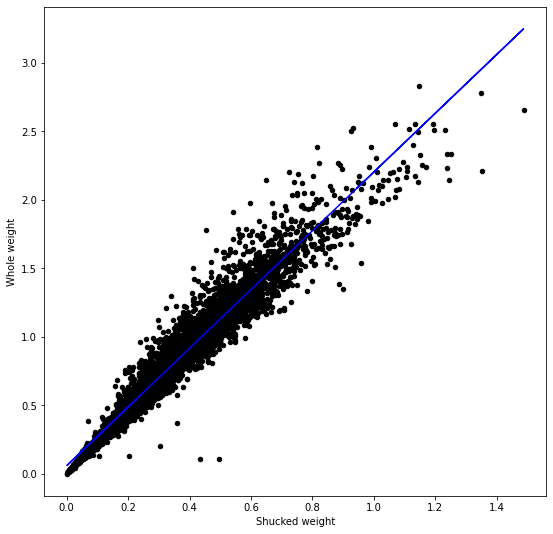

In [10]:
#Mô hình bậc 1
from sklearn import linear_model
modelabalone = linear_model.LinearRegression()
X = pd.DataFrame(dataabalone['Shucked weight'])
modelabalone.fit(X, y = dataabalone['Whole weight'])
print('Intercept của mô hình: ', modelabalone.intercept_)
print('Coeffient của mô hình: ', modelabalone.coef_)
print('Độ chính xác của mô hình: ', 
      modelabalone.score(X,y = dataabalone['Whole weight']))
dataabalone.plot(kind = 'scatter', x = 'Shucked weight', y = 'Whole weight', figsize=(9,9), 
                 color = 'black')
y_pred = modelabalone.predict(X)
plt.plot(X,y_pred, color = 'blue')

Intercept của mô hình:  9.43689570931383e-16
Coeffient của mô hình:  [ 1.0000000e+00 -1.3598504e-16]
Độ chính xác của mô hình:  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


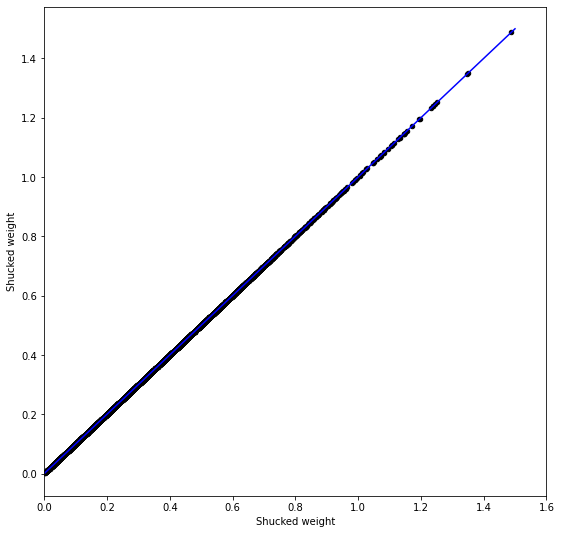

In [11]:
#Mô hình bậc 2
from sklearn import linear_model
modelabalone = linear_model.LinearRegression()
X = pd.DataFrame([dataabalone['Shucked weight'], dataabalone['Shucked weight']**2]).T
modelabalone.fit(X, y = dataabalone['Shucked weight'])
print('Intercept của mô hình: ', modelabalone.intercept_)
print('Coeffient của mô hình: ', modelabalone.coef_)
print('Độ chính xác của mô hình: ', 
      modelabalone.score(X,y = dataabalone['Shucked weight']))

import numpy as np
range = np.arange(0,1.6,0.1)
dataabalone.plot(kind = 'scatter', x = 'Shucked weight', y = 'Shucked weight', figsize=(9,9),
                 color = 'black', xlim=(0,1.6))
predictor = pd.DataFrame([range, range**2]).T
y_pred = modelabalone.predict(X = predictor)
plt.plot(range,y_pred, color = 'blue')

Intercept của mô hình:  -0.008442026696976912
Coeffient của mô hình:  [    3.36816887   -20.53934847   182.86288168  -832.61312278
  2155.27622754 -3366.66419422  3227.57341424 -1854.26823221
   584.81279235   -77.72133516]
Độ chính xác của mô hình:  0.9446194678328996


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


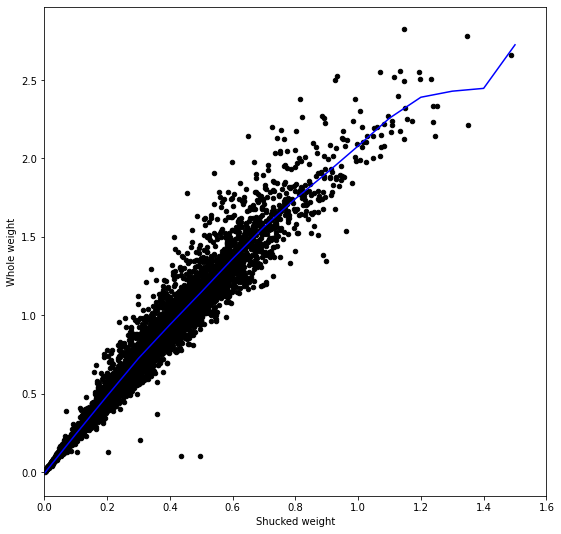

In [12]:
#Mô hình bậc 10
from sklearn import linear_model
modelabalone3 = linear_model.LinearRegression()
X = pd.DataFrame([dataabalone['Shucked weight'], dataabalone['Shucked weight']**2, dataabalone['Shucked weight']**3, dataabalone['Shucked weight']**4,
                  dataabalone['Shucked weight']**5, dataabalone['Shucked weight']**6,dataabalone['Shucked weight']**7, dataabalone['Shucked weight']**8,
                  dataabalone['Shucked weight']**9, dataabalone['Shucked weight']**10]).T
modelabalone3.fit(X, y = dataabalone['Whole weight'])
print('Intercept của mô hình: ', modelabalone3.intercept_)
print('Coeffient của mô hình: ', modelabalone3.coef_)
print('Độ chính xác của mô hình: ', 
      modelabalone3.score(X,y = dataabalone['Whole weight']))

import numpy as np
range = np.arange(0,1.6,0.1)
dataabalone.plot(kind = 'scatter', x = 'Shucked weight', y = 'Whole weight', figsize=(9,9),
                 color = 'black', xlim=(0,1.6))
predictor = pd.DataFrame([range, range**2, range**3, range**4, range**5,
                          range**6, range**7, range**8, range**9, range**10]).T
y_pred = modelabalone3.predict(X = predictor)
plt.plot(range,y_pred, color = 'blue')

<function matplotlib.pyplot.show(close=None, block=None)>

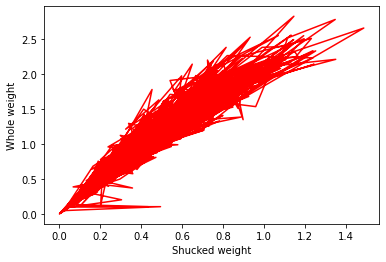

In [13]:
X = pd.DataFrame(dataabalone['Shucked weight'])
y = dataabalone['Whole weight']
plt.plot(X,y,'r')
plt.xlabel('Shucked weight')
plt.ylabel('Whole weight')
plt.show